# Introduction to Idyoms

In [1]:
using CSV, DataFrames, Plots
using Chakra, Melch
include("src/Idyoms.jl")
using Main.Idyoms

### Initialise Melch data

In [2]:
Melch.__INIT__("/Users/nick/Work/MelchData")

### Extract the nova dataset

In [3]:
nova = fnd(Melch.id(0),Melch)
nova.description

"Songs and ballads from Nova Scotia, Canada."

### Generate sequence of constituents

In [4]:
# First, extract the particles of the nova dataset. These are the melodies it contains. 

melodies = pts(nova)

# Second, turn each melody into a sequence of constituents

sequences = [sequence(pts(mel,Melch),Melch) for mel in melodies];

### Define Viewpoints

In [5]:
# We define a single atomic viewpoint, PITCH, which corresponds with the Melch attribute CPITCH.

PITCH = vp(Melch.CPITCH);

### Generate Views from Viewpoints

In [6]:
# For each sequence in the dataset, we construct a View from a source viewpoint and a target viewpoint.
# In this case, both source and target viewpoints are the same: PITCH.

pitch_view = [View(seq,PITCH,PITCH) for seq in sequences];

### Set parameters

In [7]:
# the alphabet of the viewpoint PITCH.
a = Set([54:77...,79,81])

# the type smoothing method to be used.
b = Interpolated()

# the escape method: A(), B(), C(), D(), or X()
e = A()

# update exclusion: true means update exclusion is on
u = true

# the order bound: Bounded(h), where h is the max context length, or Unbounded()
o = Bounded(5);

### Generate predictions

The functions ppm_stm, ppm_ltm, ppm_ltm_plus, ppm_both, and ppm_both_plus, all generate a sequence of predictions for each view in the dataset. For each model we can compute the mean information content, a measure of how well the view is predicted by the model parameters.

In [8]:
@time pitch_stm = Idyoms.ppm_stm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_stm)

  0.600456 seconds (12.59 M allocations: 1.353 GiB, 8.29% gc time, 35.28% compilation time)


3.1620058474495836

In [9]:
@time pitch_ltm = Idyoms.ppm_ltm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm)

  1.097401 seconds (17.68 M allocations: 2.170 GiB, 20.46% gc time, 18.00% compilation time)


3.149688853456989

In [10]:
@time pitch_ltm_plus = Idyoms.ppm_ltm_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm_plus)

  0.994985 seconds (18.08 M allocations: 2.309 GiB, 21.12% gc time, 1.58% compilation time)


2.8782888216781366

In [11]:
@time pitch_both = Idyoms.ppm_both(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both)

  1.716405 seconds (30.04 M allocations: 3.544 GiB, 27.15% gc time, 10.26% compilation time)


2.5443716225978488

In [12]:
@time pitch_both_plus = Idyoms.ppm_both_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both_plus)

  1.391943 seconds (30.58 M allocations: 3.690 GiB, 18.54% gc time, 1.98% compilation time)


2.5036819729563122

### Tabulate predictions

We can display the prediction sequences as data frames using the todataframe function.

In [13]:
pitch_table = Idyoms.todataframe(pitch_stm)

Row,SeqID,EventID,Symbol,Order,Prob,IC,H
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,1,65,-1,0.0384615,4.70044,4.70044
2,1,2,62,-1,0.0192308,5.70044,3.23156
3,1,3,60,-1,0.0131579,6.24793,3.03184
4,1,4,60,0,0.255102,1.97085,3.06074
5,1,5,60,1,0.623711,0.68105,2.08767
6,1,6,60,2,0.665138,0.588275,1.92745
7,1,7,65,0,0.103306,3.27501,1.79101
8,1,8,65,0,0.135359,2.88514,1.92345
9,1,9,65,1,0.421397,1.24675,1.96885


### Plot information profiles

We can plot the probability, information content and entropy of a sequence using Julia's Plots library. Features in these information profiles can be used to detect structure in the sequences. 

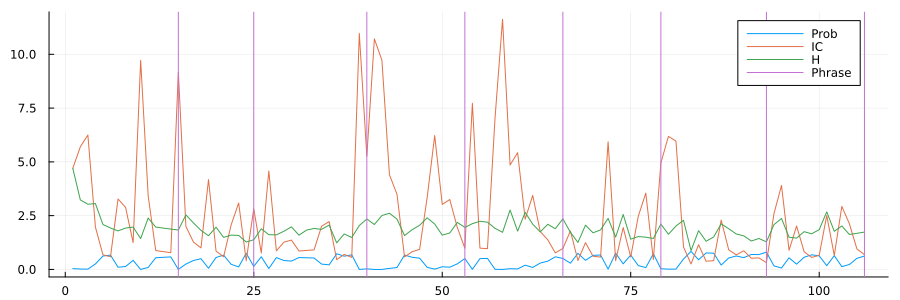

In [14]:
plot(pitch_table.Prob[1:106],label="Prob")
plot!(pitch_table.IC[1:106],label="IC")
plot!(pitch_table.H[1:106],label="H")
phrases = [e.PHRASE for e in vcat(sequences...)];
vline!(findall(x->x==-1,phrases[1:106]), lw = 1, label="Phrase")
plot!(size=(900,300))